# Homework 4: Implementing + Evaluating Spatial Partitioning Data Structures

Jake Dame

24 Jun 2024

CS 6017: Data Analytics & Visualization

Dr. Ben Jones

## Part 1: Implementation

*See code*

## Part 2: Testing/Timing

*See code*

## Part 3: Analysis

### Task 1: Plots

**"Plot parts of your data to make sense of it(what impact to K, N, D, and the data structure have?)"**

In [85]:
# Setup

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [86]:
# Get data frame

df = pd.read_csv("timing_data/timing_data.csv")
df

,k,n,d,usecs,datastructure,test
0,10,100,2,10953,QuadTree,n
1,10,1100,2,56446,QuadTree,n
2,10,2100,2,59668,QuadTree,n
3,10,3100,2,83065,QuadTree,n
4,10,4100,2,126451,QuadTree,n
...,...,...,...,...,...,...
275,750,1000,2,521945,KDTree,k
276,800,1000,2,527911,KDTree,k
277,850,1000,2,545785,KDTree,k
278,900,1000,2,577858,KDTree,k


#### QuadTree: N

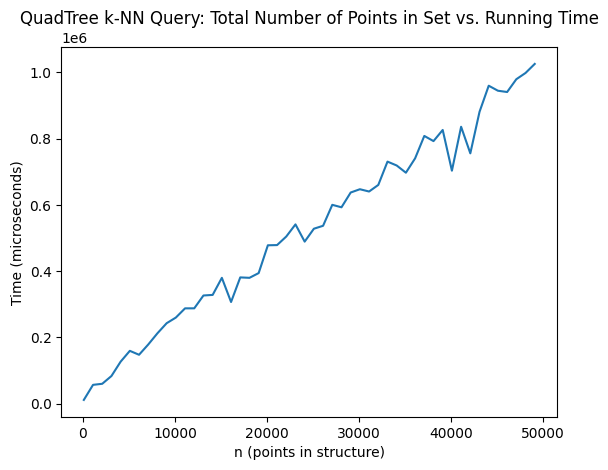

In [87]:
df_quad_n = df[ (df['datastructure'] == 'QuadTree') & (df['test'] == 'n') ]

plt.plot(df_quad_n['n'], df_quad_n['usecs'])

plt.xlabel('n (points in structure)')
plt.ylabel('Time (microseconds)')
plt.title('QuadTree k-NN Query: Total Number of Points in Set vs. Running Time')

plt.show()

#### QuadTree: K

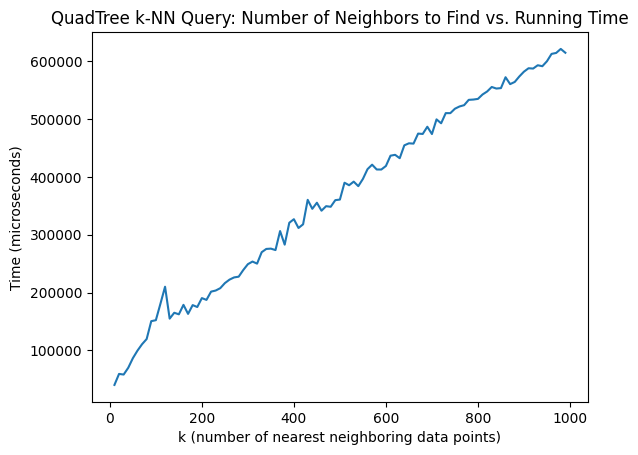

In [88]:
df_quad_k = df[ (df['datastructure'] == 'QuadTree') & (df['test'] == 'k') ]

plt.plot(df_quad_k['k'], df_quad_k['usecs'])

plt.xlabel('k (number of nearest neighboring data points)')
plt.ylabel('Time (microseconds)')
plt.title('QuadTree k-NN Query: Number of Neighbors to Find vs. Running Time')

plt.show()

#### $k$-D Tree: D

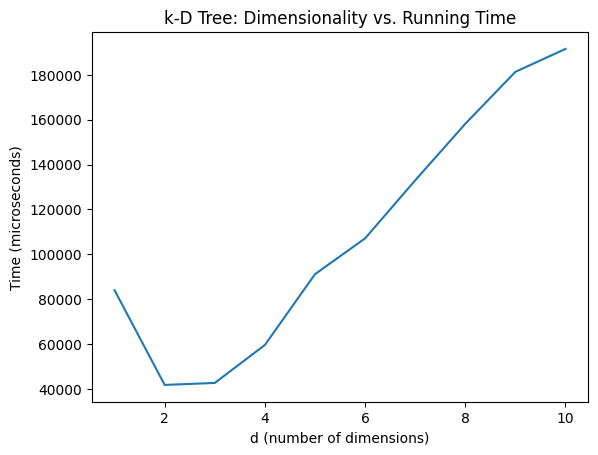

In [89]:
df_kd_d = df[ (df['datastructure'] == 'KDTree') & (df['test'] == 'd') ]

plt.plot(df_kd_d['d'], df_kd_d['usecs'])

plt.xlabel('d (number of dimensions)')
plt.ylabel('Time (microseconds)')
plt.title('k-D Tree: Dimensionality vs. Running Time')

plt.show()

#### $k$-D Tree: N

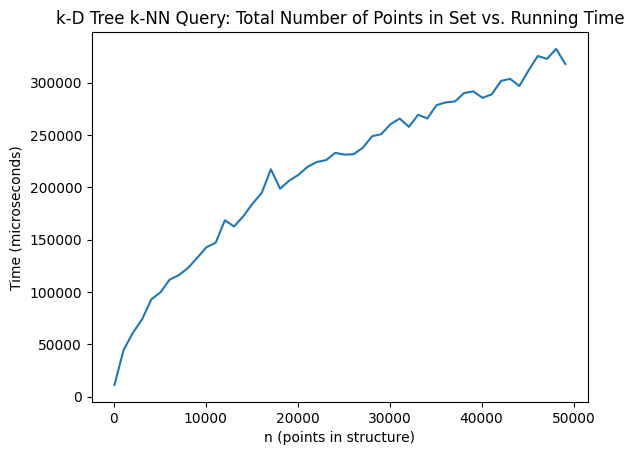

In [90]:
df_kd_n = df[ (df['datastructure'] == 'KDTree') & (df['test'] == 'n') ]

plt.plot(df_kd_n['n'], df_kd_n['usecs'])

plt.xlabel('n (points in structure)')
plt.ylabel('Time (microseconds)')
plt.title('k-D Tree k-NN Query: Total Number of Points in Set vs. Running Time')

plt.show()

#### $k$-D Tree: K

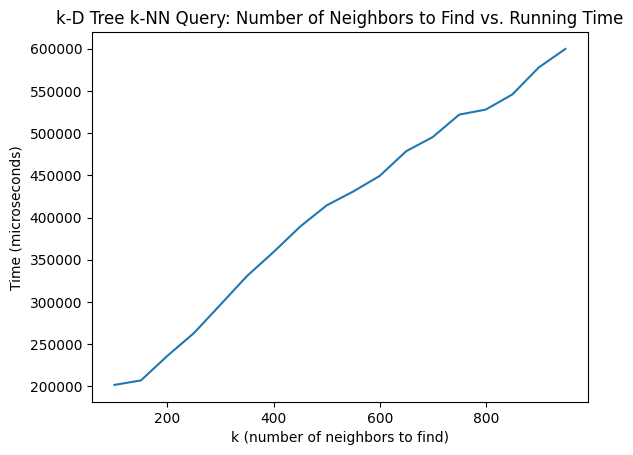

In [91]:
df_kd_k = df[ (df['datastructure'] == 'KDTree') & (df['test'] == 'k') ]

plt.plot(df_kd_k['k'], df_kd_k['usecs'])

plt.xlabel('k (number of neighbors to find)')
plt.ylabel('Time (microseconds)')
plt.title('k-D Tree k-NN Query: Number of Neighbors to Find vs. Running Time')

plt.show()

#### Bucketing: D

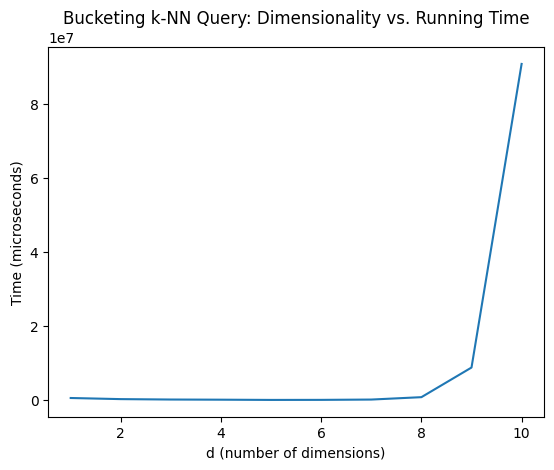

In [92]:
df_bucket_d = df[ (df['datastructure'] == 'Bucketing') & (df['test'] == 'd') ]

plt.plot(df_bucket_d['d'], df_bucket_d['usecs'])

plt.xlabel('d (number of dimensions)')
plt.ylabel('Time (microseconds)')
plt.title('Bucketing k-NN Query: Dimensionality vs. Running Time')

plt.show()

#### Bucketing: N

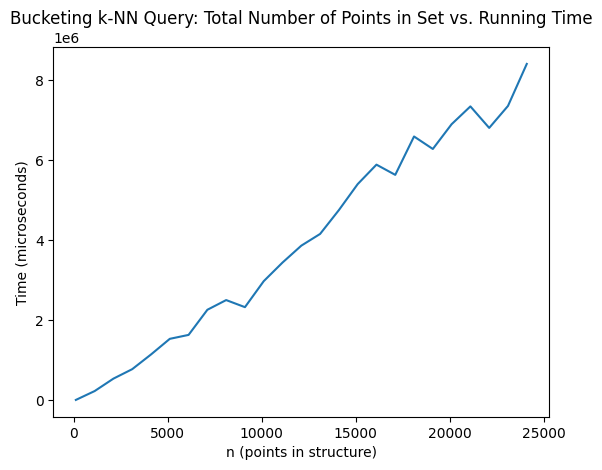

In [93]:
df_bucket_n = df[ (df['datastructure'] == 'Bucketing') & (df['test'] == 'n') ]

plt.plot(df_bucket_n['n'], df_bucket_n['usecs'])

plt.xlabel('n (points in structure)')
plt.ylabel('Time (microseconds)')
plt.title('Bucketing k-NN Query: Total Number of Points in Set vs. Running Time')

plt.show()

#### Bucketing: K

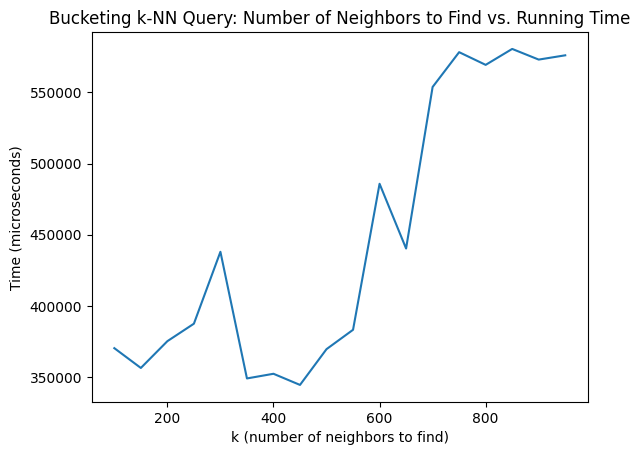

In [94]:
df_bucket_k = df[ (df['datastructure'] == 'Bucketing') & (df['test'] == 'k') ]

plt.plot(df_bucket_k['k'], df_bucket_k['usecs'])

plt.xlabel('k (number of neighbors to find)')
plt.ylabel('Time (microseconds)')
plt.title('Bucketing k-NN Query: Number of Neighbors to Find vs. Running Time')

plt.show()

#### Comparison: D

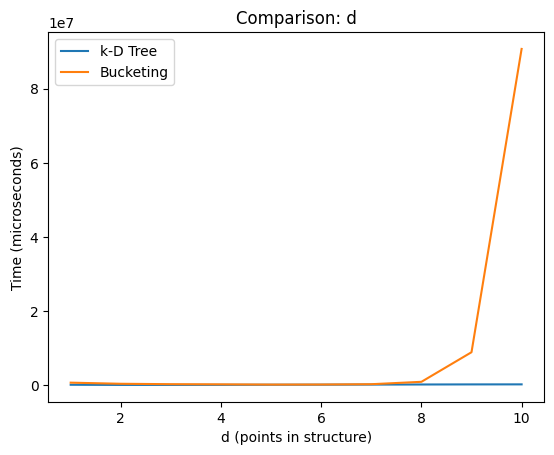

In [95]:
plt.plot(df_kd_d['d'], df_kd_d['usecs'], label='k-D Tree')
plt.plot(df_bucket_d['d'], df_bucket_d['usecs'], label='Bucketing')

plt.xlabel('d (points in structure)')
plt.ylabel('Time (microseconds)')
plt.title('Comparison: d')

plt.legend()

plt.show()

#### Comparison: N

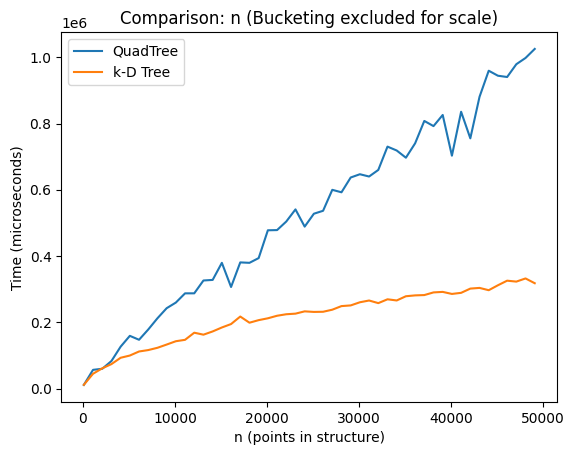

In [96]:
plt.plot(df_quad_n['n'], df_quad_n['usecs'], label='QuadTree')
plt.plot(df_kd_n['n'], df_kd_n['usecs'], label='k-D Tree')

plt.xlabel('n (points in structure)')
plt.ylabel('Time (microseconds)')
plt.title('Comparison: n (Bucketing excluded for scale)')

plt.legend()

plt.show()


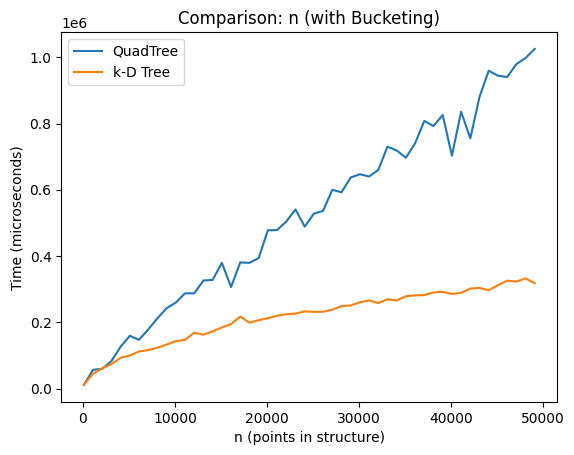

In [97]:
plt.plot(df_quad_n['n'], df_quad_n['usecs'], label='QuadTree')
plt.plot(df_kd_n['n'], df_kd_n['usecs'], label='k-D Tree')

plt.xlabel('n (points in structure)')
plt.ylabel('Time (microseconds)')
plt.title('Comparison: n (with Bucketing)')

plt.legend()

plt.show()

#### Comparison: K

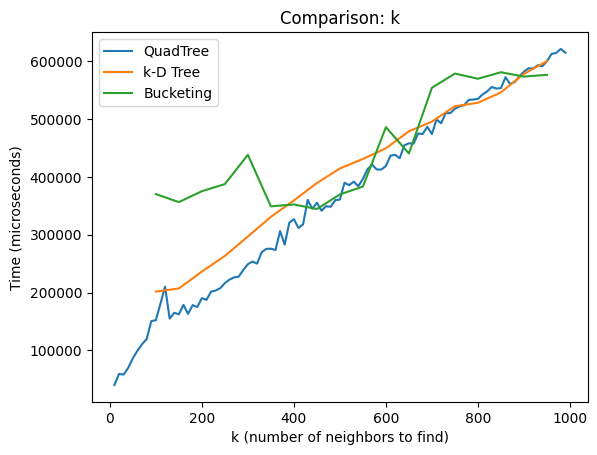

In [98]:
plt.plot(df_quad_k['k'], df_quad_k['usecs'], label='QuadTree')
plt.plot(df_kd_k['k'], df_kd_k['usecs'], label='k-D Tree')
plt.plot(df_bucket_k['k'], df_bucket_k['usecs'], label='Bucketing')


plt.xlabel('k (number of neighbors to find)')
plt.ylabel('Time (microseconds)')
plt.title('Comparison: k')

plt.legend()

plt.show()

#### Plotting Analysis

Description of experiments:
- For each timing (each time a variable was changed), the time represents the *total* amount of time it took for a $k$-NN query to be performed using a particular data structure for 100 query/test points
- The other variables were kept constant across all experiments
- The range and nature of the way the independent variable was incremented was kept conceptually consistent, but some numbers had to be changed due to too long of runtimes for the experiments (e.g. Bucketing could not handle the types of $n$'s that the other data structures could, and therefore, did not have the same range of $n$'s tested as the others)
- The training points (total points in data set) consisted of 1000 points from a Gaussian distribution; the testing (query) points consisted of 100 points froma Uniform distribution

##### $n$ Experiments

1. **Setup**
- $k$ was kept at 10
- $d$ was kept at 2
- $n$ was incremented
2. **Big O Observations**
- With Bucketing uncommented, you can see it is almost quadratic $O(N^2)$ or even $O(2^N)$. I don't think Bucketing is supposed to be this bad, but it probably is just due to the fact that we were inputting huge $n$'s while not changing the bucket size/number of divisions, which made it really slow, especially in combination with clumping (see below)
- $k$-D Tree has a really clear $O(lgN)$ line, illustrating its similarities to BST in its logarithmic behavior (as N grows, the rate of increase in runtime gets halved approaching infinity)
- The QuadTree appears linear when alone, but much closer to $O(lgN)$ or $O(NlgN)$ when compared to Bucketing
3. **Interesting/Unexpected Things and Other Observations**
- Bucketing was really, really slow in comparison to the other two data structures (uncomment the bucketing plot in the "Comparison: n" graph and it dwarfs the other two)

##### $k$ Experiments

1. **Setup**
- $n$ was kept at 1000
- $d$ was kept at 2
- $k$ was incremented
2. **Big O Observations**
- All of the data structures seemed to have similar big $O$ behavior regarding $k$ in that runtime appeared to grow linearly in proportion to the size of $k$ (the number of nearest points to find before returning). So the (observed) behavior for $n$ here is $O(N)$.
3. **Interesting/Unexpected Things and Other Observations**
- Bucket had a lot of inconsistency, and its line is sort of all over the place, if still generally trending upward (it definitely struggles with large $n$); howver it also (for this set of measurements) started out pretty un-optimal. My explanation here is, since I am using a Gaussian distribution for the training points, there could very well be a lot of clumping going on. At that point, the performance of Bucketing would be less predictable and more having to do with number of divisions and its interplay with the random chance that the Gaussian distribution didn't result in too dense of buckets

##### $d$ Experiments

1. **Setup**
- $n$ was kept at 1000
- $k$ was kept at 10
- $d$ was incremented from $1$ to $11$
- Description of experiment: multiple $k$-NN queries were performed and timed, searching for the $k$-nearest neighbors amongst a data set of $n = 1000$; all points/data structures were two-dimensional
2. **Big O Observations**
- For the two data structures tested ($k$-D Tree and Bucketing, since QuadTree really only works in the 2nd-dimension), both had pretty weird results. See below.
- However, in comparison to Bucketing, we can see the $k$-D tree is *relatively* unaffected by the dimensionality (at least, for dimensions 1-11 - the ones timed). This shows the cool property of $k$-D trees - that they are a (possible/relative) outlier when it comes to the curse of dimensionality
3. **Interesting/Unexpected Things and Other Observations**
- Bucketing performed insanely well with dimensions 1-6, and then absolutely crashed in terms of performance. This has to do with the ratio between the length of the bucket and the dimension. When plotted this ratio is asymptotic, and gets really slow after 6.
- $k$-D Tree had some weird behavior here: it consistently (after multiple experiments and tweaks) has a raised running time in 1D, before dropping down with 2D, and then rising steadily from there. I am at a loss for explanation, but imagine it might just be something in my implementation. $k$-D trees are essentially just BSTs in the 1th-dimension, so it might have something to do with the balancing, because BSTs should also be $O(lgN)$.

### Task 2: Regression

**"Perform regression based on the performance we expect to see. Do tests confirm or disprove our expectations? What running times do you expect to see based on simple big-O analysis?"**

#### QuadTree: Regression

In [99]:
df_quad = df[ (df['datastructure'] == 'QuadTree') ]

model_kd = smf.ols( formula='usecs ~ n + k', data=df_quad ).fit()

print( model_kd.summary() )

                            OLS Regression Results                            
Dep. Variable:                  usecs   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     6594.
Date:                Tue, 25 Jun 2024   Prob (F-statistic):          7.51e-144
Time:                        20:21:30   Log-Likelihood:                -1711.1
No. Observations:                 149   AIC:                             3428.
Df Residuals:                     146   BIC:                             3437.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.311e+04   3993.819     13.299      0.0

##### Analysis

**For the QuadTree:
**
$k$ alone has an $R^2$ of $0.03$ (not interesting)
$n$ alone has $R^2$ of $0.5$ (somewhat interesting but not amazing)

$k$ plus $n$ have an $R^2$ of $.989$, and both have strong positive coefficients and $p$-values of (really close to) $0$, so the results are statistically signifcant.

Meaning it is safe to say that a combination of $k$ and $n$ have the strongest predictive power for run time for the QuadTree.

The super high $R^2$ value could be possibly overfitting, but this model seems to make sense: that $n$ alone is a significant but not super powerful predictor of runtime, because when we factor in $k$, we get $98.9\%$ of the variation in the data explained by this combo.

#### $k$-D Tree: Regression

In [100]:
df_kd = df[ (df['datastructure'] == 'KDTree') ]

model_kd = smf.ols( formula='usecs ~ n + k', data=df_kd ).fit()

print( model_kd.summary() )

                            OLS Regression Results                            
Dep. Variable:                  usecs   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     735.0
Date:                Tue, 25 Jun 2024   Prob (F-statistic):           5.36e-50
Time:                        20:21:30   Log-Likelihood:                -911.63
No. Observations:                  78   AIC:                             1829.
Df Residuals:                      75   BIC:                             1836.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9.478e+04   5893.361     16.082      0.0

##### Analysis

For the $k$-D Tree:

This is similar to the analysis on the QuadTree regression, except now we have the $d$ parameter.

However, adding in $d$ only increased the $R^2$ from $0.95$ to $0.96$, with no other change, which confirms the expectation that kd tree is somewhat immune to the curse of dimensionality, because dimensionality doesn't really add anything substantial to explain the variation in performance. The height of a $k$-D Tree is always $lgN$, no matter the dimension.

#### Bucketing: Regression

In [101]:
df_bucket = df[ (df['datastructure'] == 'Bucketing') ]

model_bucket = smf.ols( formula='usecs ~ d + n', data=df_bucket ).fit()

print( model_bucket.summary() )

                            OLS Regression Results                            
Dep. Variable:                  usecs   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     13.57
Date:                Tue, 25 Jun 2024   Prob (F-statistic):           1.96e-05
Time:                        20:21:30   Log-Likelihood:                -929.02
No. Observations:                  53   AIC:                             1864.
Df Residuals:                      50   BIC:                             1870.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9.294e+06   3.01e+06     -3.090      0.0

##### Analysis

$d$ plus $n$ is strongest.

Adding $k$ increases it negligibly; in addition, the $p$-value for $k$ is $0.496$ (very bad, and not statistically significant).

The $R^2$ value is not great either at $0.352$.

Conclusion: There is more to the bucketing approach in terms of predicting performance, in terms of time complexity, than can be explained by just $d$, $n$, $k$, or any combination of the three This is also potentially due to the random nature and luck involved in clumping, as well as number of divisions of the regular grid (which was never changed during the timing experiments), especially when testing really large numbers of training points from a Gaussian distribution (because of the potential for really bad clumping leading to really slow times, none of which would necessarily be explained by n, k, or d alone).

This was addressed in pieces throughout the Plotting Analysis and various regression analyses.